# Nagykereskedelmi vállalat ügyfeleinek szegmentálása

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler
%matplotlib inline

/opt/conda/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('../_data/wholesale_customers_data.csv')
df.head()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen
0,retail,Other Region,12669,9656,7561,214,2674,1338
1,retail,Other Region,7057,9810,9568,1762,3293,1776
2,retail,Other Region,6353,8808,7684,2405,3516,7844
3,horeca,Other Region,13265,1196,4221,6404,507,1788
4,retail,Other Region,22615,5410,7198,3915,1777,5185


In [3]:
prod_cols = ['fresh', 'milk', 'grocery', 'frozen', 'detergents_paper', 'delicassen']

In [4]:
df_original = df.copy()

In [5]:
scaler = StandardScaler()
df.loc[:, prod_cols] = scaler.fit_transform(df.loc[:, prod_cols])

In [6]:
df = df.merge(df_original.loc[:, prod_cols], left_index = True, right_index = True, suffixes = ('', '_orig'))

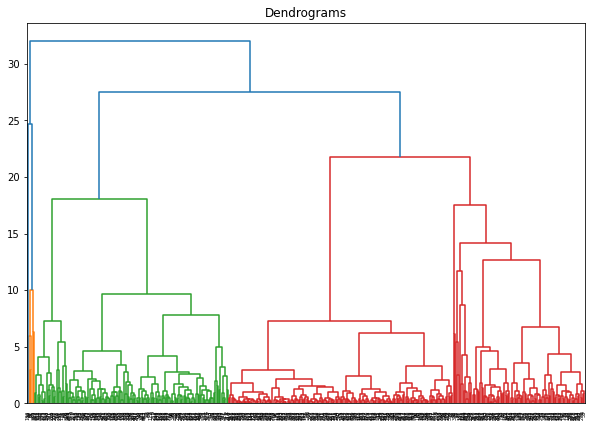

In [7]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  

mergings = shc.linkage(df.loc[:, prod_cols], method='ward')
dend = shc.dendrogram(mergings)

In [8]:
mergings = shc.linkage(df.loc[:, ['grocery', 'detergents_paper']], method='ward')

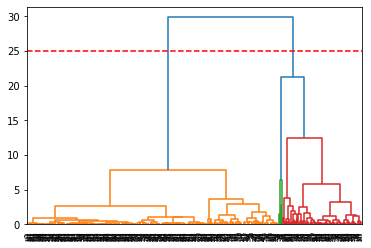

In [9]:
dend = shc.dendrogram(mergings)
plt.axhline(25, color='r', ls='--')

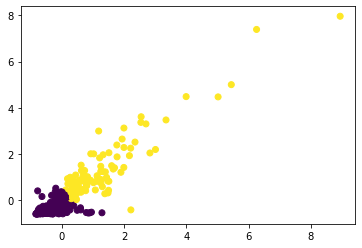

In [10]:
df['cluster'] = shc.fcluster(mergings,25, criterion='distance')
plt.scatter(df['grocery'], df['detergents_paper'], c=df['cluster'])

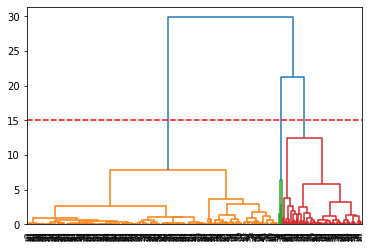

In [11]:
dend = shc.dendrogram(mergings)
plt.axhline(15, color='r', ls='--')

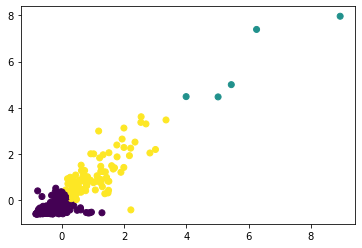

In [12]:
df['cluster'] = shc.fcluster(mergings,15, criterion='distance')
plt.scatter(df['grocery'], df['detergents_paper'], c=df['cluster'])

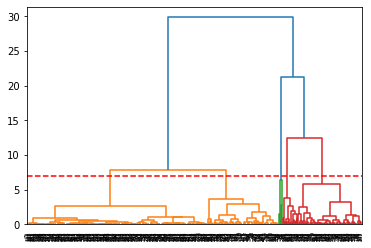

In [13]:
dend = shc.dendrogram(mergings)
plt.axhline(7, color='r', ls='--')

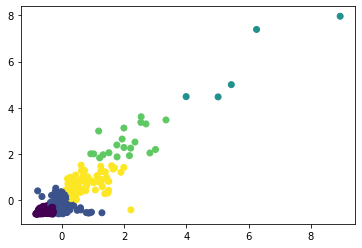

In [14]:
df['cluster'] = shc.fcluster(mergings,7, criterion='distance')
plt.scatter(df['grocery'], df['detergents_paper'], c=df['cluster'])

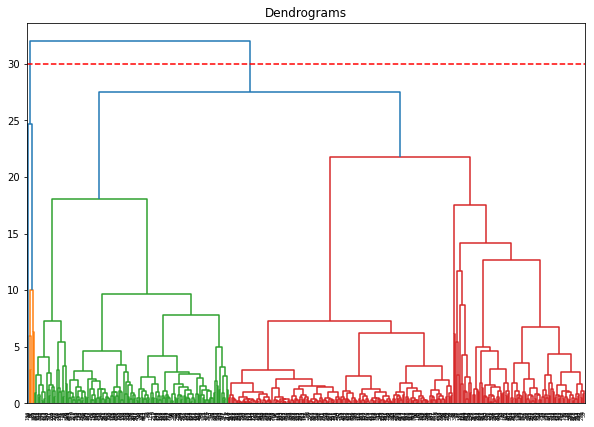

In [15]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  

plt.axhline(30, color = 'red', linestyle = '--')

mergings = shc.linkage(df.loc[:, prod_cols], method='ward')
dend = shc.dendrogram(mergings)

In [16]:
df['cluster'] = shc.fcluster(mergings, 25, criterion='distance')

In [17]:
df['cluster'].value_counts()

3    281
2    153
1      6
Name: cluster, dtype: int64

In [18]:
df.groupby('cluster').mean()

,fresh,milk,grocery,frozen,detergents_paper,delicassen,fresh_orig,milk_orig,grocery_orig,frozen_orig,detergents_paper_orig,delicassen_orig
cluster,,,,,,,,,,,,
1,1.225106,5.120181,4.913134,1.075185,4.648220,3.096654,27477.000000,43542.166667,54588.500000,8285.666667,25018.333333,10247.833333
2,-0.491259,0.491540,0.612120,-0.332051,0.636625,0.018722,5794.241830,9419.888889,13761.738562,1461.764706,5913.379085,1577.607843
3,0.241324,-0.376963,-0.438196,0.157839,-0.445883,-0.076314,15048.932384,3017.298932,3791.761566,3837.316726,758.007117,1309.900356


In [19]:
orig_columns = [col for col in df.columns if '_orig' in col]

df[orig_columns + ['cluster']].groupby('cluster').mean()

,fresh_orig,milk_orig,grocery_orig,frozen_orig,detergents_paper_orig,delicassen_orig
cluster,,,,,,
1,27477.000000,43542.166667,54588.500000,8285.666667,25018.333333,10247.833333
2,5794.241830,9419.888889,13761.738562,1461.764706,5913.379085,1577.607843
3,15048.932384,3017.298932,3791.761566,3837.316726,758.007117,1309.900356


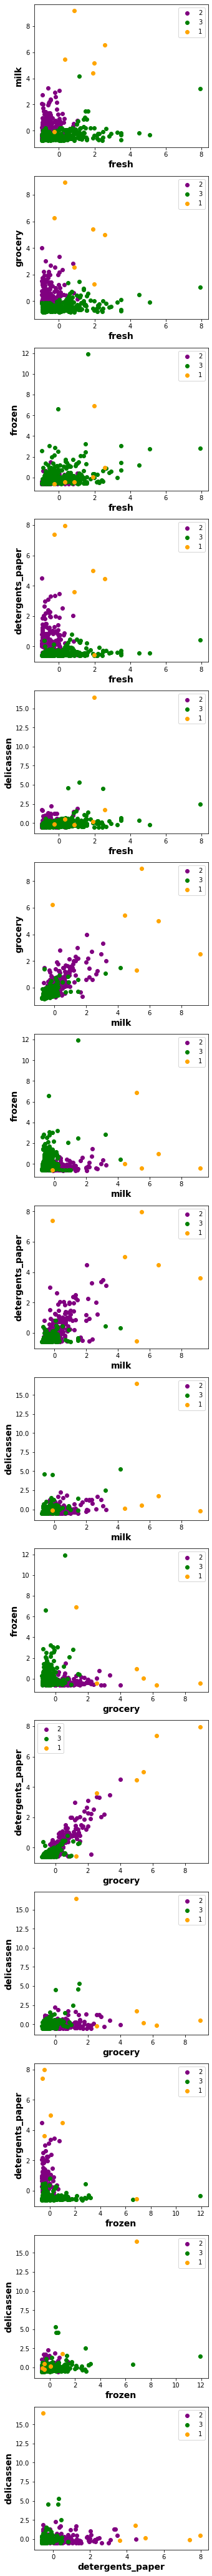

In [20]:
fig, ax = plt.subplots(15, figsize=(5, 75))
i = 0

color = {1: 'orange', 2: 'purple', 3: 'green'}

for col in prod_cols:
    
    col_idx = prod_cols.index(col)
    for col2 in prod_cols[col_idx+1:]:
        
        for cluster in df['cluster'].unique():
            sub_df = df.loc[df['cluster'] == cluster]
            
            x_col = col
            y_col = col2
            ax[i].scatter(sub_df[x_col], sub_df[y_col], c=color[cluster], label = cluster)
            ax[i].set_xlabel(x_col, fontweight='bold', fontsize=14)
            ax[i].set_ylabel(y_col, fontweight='bold', fontsize=14)
            ax[i].legend()

        i += 1

plt.show()

<AxesSubplot:xlabel='channel'>

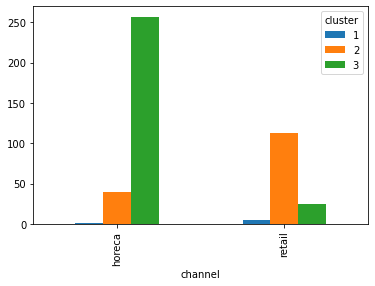

In [21]:
df.groupby(['channel', 'cluster']).size().unstack().plot.bar()

<AxesSubplot:xlabel='channel'>

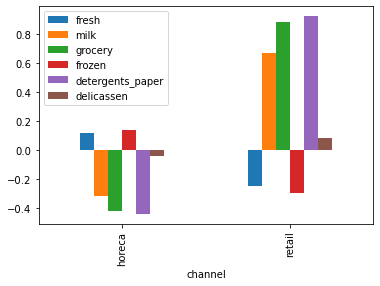

In [22]:
df.groupby(['channel'])[prod_cols].mean().plot.bar()

In [23]:
df.loc[:, prod_cols].T

,0,1,2,3,4,5,6,7,8,9,...,430,431,432,433,434,435,436,437,438,439
fresh,0.052933,-0.391302,-0.447029,0.100111,0.840239,-0.204806,0.009950,-0.349981,-0.477901,-0.474497,...,-0.704768,-0.274465,0.721661,-0.793029,0.374473,1.401312,2.155293,0.200326,-0.135384,-0.729307
milk,0.523568,0.544458,0.408538,-0.624020,-0.052396,0.334067,-0.352316,-0.113981,-0.291409,0.718495,...,-0.212462,-0.039374,-0.628632,-0.349738,-0.254242,0.848446,-0.592142,1.314671,-0.517536,-0.555924
grocery,-0.041115,0.170318,-0.028157,-0.392977,-0.079356,-0.297637,-0.102849,0.155359,-0.185336,1.151423,...,0.898799,-0.294055,-0.336826,-0.680366,0.004501,0.850760,-0.757165,2.348386,-0.602514,-0.573227
frozen,-0.589367,-0.270136,-0.137536,0.687144,0.173859,-0.496155,-0.534512,-0.289315,-0.545854,-0.394488,...,-0.514921,2.147605,-0.578025,-0.315711,-0.491618,2.075222,0.296561,-0.543380,-0.419441,-0.620094
detergents_paper,-0.043569,0.086407,0.133232,-0.498588,-0.231918,-0.228138,0.054280,0.092286,-0.244726,0.954031,...,-0.554442,-0.315909,-0.326197,-0.530295,-0.107192,-0.566831,-0.585519,2.511218,-0.569770,-0.504888
delicassen,-0.066339,0.089151,2.243293,0.093411,1.299347,-0.026224,-0.347854,0.369601,-0.275079,0.203461,...,0.197071,-0.009539,-0.401104,-0.026934,-0.243839,0.241091,0.291501,0.121456,0.213046,-0.522869


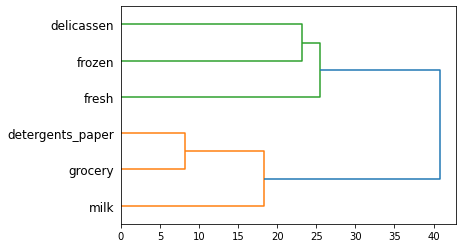

In [24]:
products = df.loc[:, prod_cols].T

mergings = shc.linkage(products, method='ward')
dend = shc.dendrogram(mergings, labels = prod_cols, orientation = 'right')

<AxesSubplot:xlabel='region'>

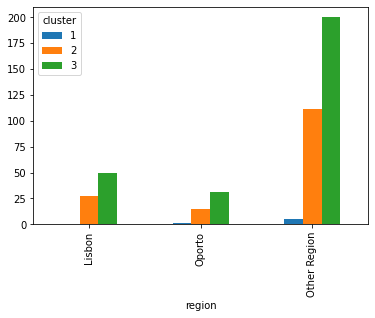

In [25]:
df.groupby(['region', 'cluster']).size().unstack().plot.bar()